In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

print("Dimencion de los datos:", X.shape)
print("\nNombre de las caracteristicas:", feature_names)
print("\nDistribucion de clases", np.bincount(y))
print("Nombre de clases:", target_names)

Dimencion de los datos: (569, 30)

Nombre de las caracteristicas: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Distribucion de clases [212 357]
Nombre de clases: ['malignant' 'benign']


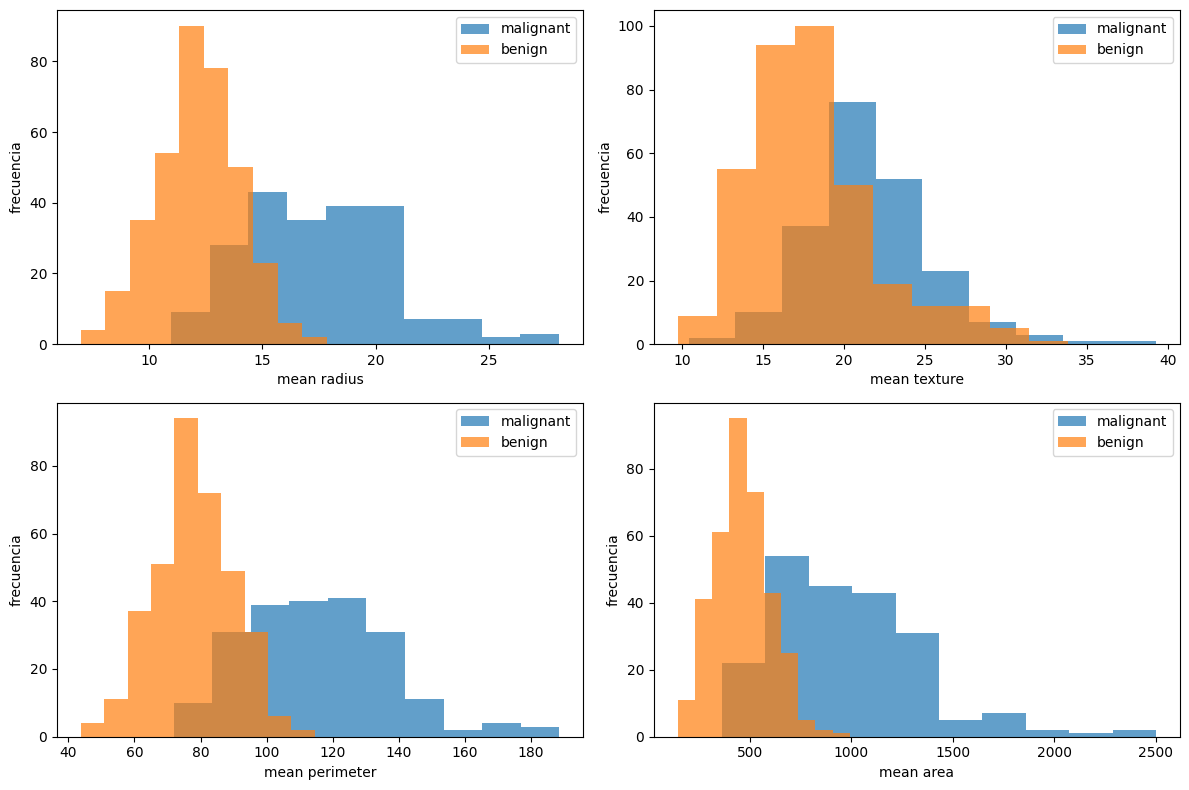

In [9]:
df = pd.DataFrame(X, columns=feature_names)
df['target']=y

plt.figure(figsize=(12, 8))
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for i, feature in enumerate(features_to_plot,1):
    plt.subplot(2, 2, i)
    for target in [0, 1]:
        plt.hist(df[df['target'] == target][feature],
                 alpha = 0.7, label=target_names[target])
    plt.xlabel(feature)
    plt.ylabel('frecuencia')
    plt.legend()
plt.tight_layout()
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

pipeline = Pipeline(
    ('sclaer', StandardScaler(),
     'smv', SVC(probability = True, random_state=42))
)

param_grid = {
    'svm__C' : [0.1, 1, 10, 100],
    'svm__gamma' : [1, 0.1, 0.01, 0.001],
    'svm__kernel' : ['rdf', 'linear', 'poly']
}

print("Iniciando busqueda de hiperparametros...")
grid_serch = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_serch.fit(X_train, y_train)

print("\nMejores parametros:", grid_serch.best_params_)
print("Mejor score de validacion cruzada:", grid_serch.best_score_)

Iniciando busqueda de hiperparametros...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


ValueError: Invalid parameter 'svm' for estimator Pipeline(steps=('sclaer', StandardScaler(), 'smv',
                SVC(probability=True, random_state=42))). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

In [17]:
best_model = grid_serch.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

print(f"\nPrecision en test:{accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de clasificacion:")
print(classification_report(y_test, y_pred, target_names=target_names))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'